In [1]:
#importing the necessary libraries
import torch
import pandas as pd
import re
import matplotlib.pyplot as plt


from torch.utils.data import TensorDataset

from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
!pip install transformers
from transformers import BertTokenizer
from transformers import BertForSequenceClassification


In [2]:
#importing the dataset into a DataFrame
df = pd.read_csv('mbti_1.csv')

In [3]:
#showing the first 5 rows of the dataset
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
#showing dataset infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [5]:
#showing the posts of the first user in the dataset
df.posts.values[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [6]:
#showing the number of users per personality type
df.type.value_counts()

,count
type,
INFP,1832
INFJ,1470
INTP,1304
INTJ,1091
ENTP,685
ENFP,675
ISTP,337
ISFP,271
ENTJ,231


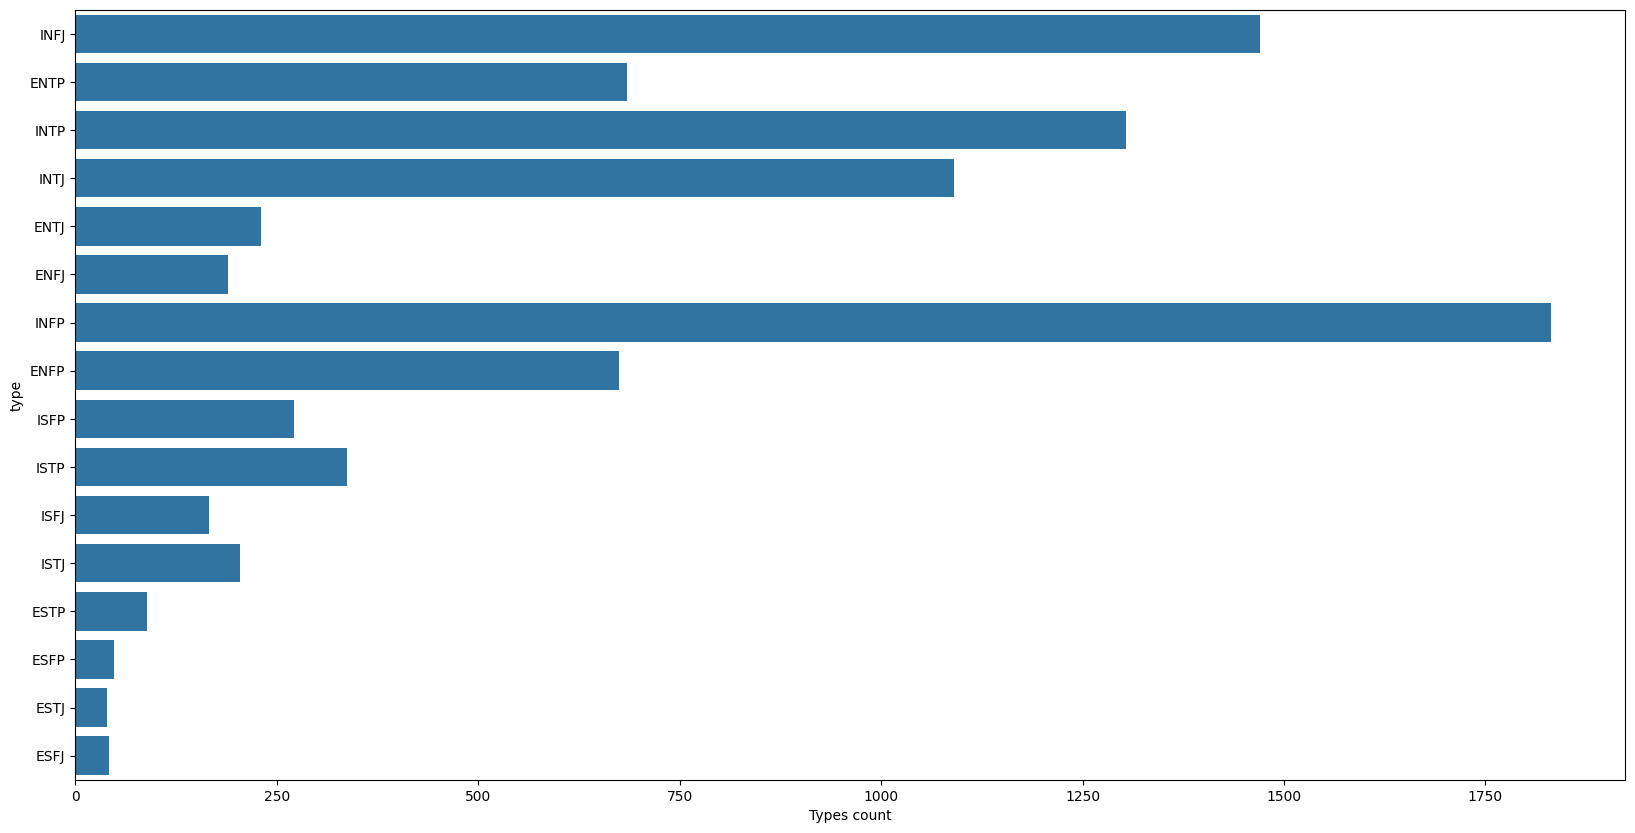

In [7]:
#visualizing the number of users per personality type using a histogram
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(df.type)
plt.xlabel('Types count');

In [8]:
#removing URLs and punctuation from dataset
for index in df.index.values:
  df.posts.iloc[index] = ' '.join(df.posts.iloc[index].split('|||'))
  df.posts.iloc[index] = re.sub(r"http\S+","",df.posts.iloc[index])
  df.posts.iloc[index] = re.sub(r"[-/@.?!_,:;()|0-9]","",df.posts.iloc[index])
  df.posts.iloc[index] = ' '.join(df.posts.iloc[index].split('  '))
df.head(10)

"""
saving the clean dataset into a csv file
df.to_csv('mbti_clean_dataset.csv',index=False)
"""

<ipython-input-8-0e08f32183a8>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.posts.iloc[index] = ' '.join(df.posts.iloc[index].split('|||'))
<ipython-input-8-0e08f32183a8>:4: FutureWarning: ChainedAssignmentError: behaviour will change

"\nsaving the clean dataset into a csv file\ndf.to_csv('mbti_clean_dataset.csv',index=False)\n"

In [9]:
#identifying the different classes of users in the dataset
labels = df.type.unique()
labels

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [10]:
#mapping personality types with their numberical representation
labels2 = []
label_rep = {}
for index,labels in enumerate(labels):
    label_rep[labels] = index
    labels2.append(labels)
labels2

['INFJ',
 'ENTP',
 'INTP',
 'INTJ',
 'ENTJ',
 'ENFJ',
 'INFP',
 'ENFP',
 'ISFP',
 'ISTP',
 'ISFJ',
 'ISTJ',
 'ESTP',
 'ESFP',
 'ESTJ',
 'ESFJ']

In [11]:
label_rep

{'INFJ': 0,
 'ENTP': 1,
 'INTP': 2,
 'INTJ': 3,
 'ENTJ': 4,
 'ENFJ': 5,
 'INFP': 6,
 'ENFP': 7,
 'ISFP': 8,
 'ISTP': 9,
 'ISFJ': 10,
 'ISTJ': 11,
 'ESTP': 12,
 'ESFP': 13,
 'ESTJ': 14,
 'ESFJ': 15}

In [12]:
#replacing each personality type with its numerical representation
df['label'] = df.type.replace(label_rep)
df.head(10)

<ipython-input-12-3efa69faa05f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df.type.replace(label_rep)


,type,posts,label
0,INFJ,' enfp and intj moments sportscenter not top ...,0
1,ENTP,'I'm finding the lack of me in these posts ver...,1
2,INTP,'Good one Of course to which I say I know th...,2
3,INTJ,'Dear INTP I enjoyed our conversation the oth...,3
4,ENTJ,'You're fired That's another silly misconcepti...,4
5,INTJ,' Science is not perfect No scientist claims t...,3
6,INFJ,'No I can't draw on my own nails haha Those we...,0
7,INTJ,'I tend to build up a collection of things on ...,3
8,INFJ,I'm not sure that's a good question The distin...,0
9,INTP,' I'm in this position where I have to actuall...,2


In [13]:
#Splitting the dataset into training (85% of the data) and test (15% of the data) sets
x_train, x_test, y_train, y_test = train_test_split(df.index.values, df.label.values, test_size=0.15, random_state=17, stratify=df.label.values)

In [14]:
#creating a new column "data_type"
df['data_type'] = ['not_set']*df.shape[0]

In [15]:
#identifying the rows belonging to both training and test sets
df.loc[x_train,'data_type'] = 'train'
df.loc[x_test,'data_type'] = 'test'

In [16]:
df.head(10)

,type,posts,label,data_type
0,INFJ,' enfp and intj moments sportscenter not top ...,0,train
1,ENTP,'I'm finding the lack of me in these posts ver...,1,train
2,INTP,'Good one Of course to which I say I know th...,2,train
3,INTJ,'Dear INTP I enjoyed our conversation the oth...,3,train
4,ENTJ,'You're fired That's another silly misconcepti...,4,test
5,INTJ,' Science is not perfect No scientist claims t...,3,train
6,INFJ,'No I can't draw on my own nails haha Those we...,0,test
7,INTJ,'I tend to build up a collection of things on ...,3,test
8,INFJ,I'm not sure that's a good question The distin...,0,train
9,INTP,' I'm in this position where I have to actuall...,2,train


In [17]:
#showing the amount of data reserved for training and test per personality type
df.groupby(['type','label','data_type']).count()

posts
type label data_type       
ENFJ 5     test          28
           train        162
ENFP 7     test         101
           train        574
ENTJ 4     test          35
           train        196
ENTP 1     test         103
           train        582
ESFJ 15    test           6
           train         36
ESFP 13    test           7
           train         41
ESTJ 14    test           6
           train         33
ESTP 12    test          13
           train         76
INFJ 0     test         221
           train       1249
INFP 6     test         275
           train       1557
INTJ 3     test         164
           train        927
INTP 2     test         196
           train       1108
ISFJ 10    test          25
           train        141
ISFP 8     test          41
           train        230
ISTJ 11    test          31
           train        174
ISTP 9     test          50
           train        287

In [18]:
#creating a BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [19]:
#encoding the data using our tokenizer
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].posts.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    df[df.data_type=='test'].posts.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [20]:
#showing an example of data tokenized and encoded by BERT tokenizer
encoded_data_test

{'input_ids': tensor([[  101,  1005,  2017,  ...,  2026, 13148,   102],
        [  101,  1005,  2053,  ...,  2016,  2515,   102],
        [  101,  1005,  1045,  ...,  4426,  2079,   102],
        ...,
        [  101,  1005,  1045,  ..., 10047,  5457,   102],
        [  101,  1005,  2023,  ...,  3798,  1997,   102],
        [  101,  1005,  2009,  ...,  1055,  2035,   102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}

In [21]:
#preparing inputs for BERT model
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

In [22]:
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(df[df.data_type=='test'].label.values)

In [23]:
dataset_train = TensorDataset(input_ids_train,attention_masks_train,labels_train)
dataset_test = TensorDataset(input_ids_test,attention_masks_test,labels_test)
len(dataset_train)

7373

In [24]:
#creating a BertForSequenceClassification model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_rep),
                                                      output_attentions=False,
                                                      output_hidden_states=False)



model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [26]:
#Defining the batch size
batch_size = 32
#less for limited hardware ressources. Example : 4

In [27]:
#creating dataloader to load the data while training
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)

dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [28]:
from transformers import AdamW, get_linear_schedule_with_warmup

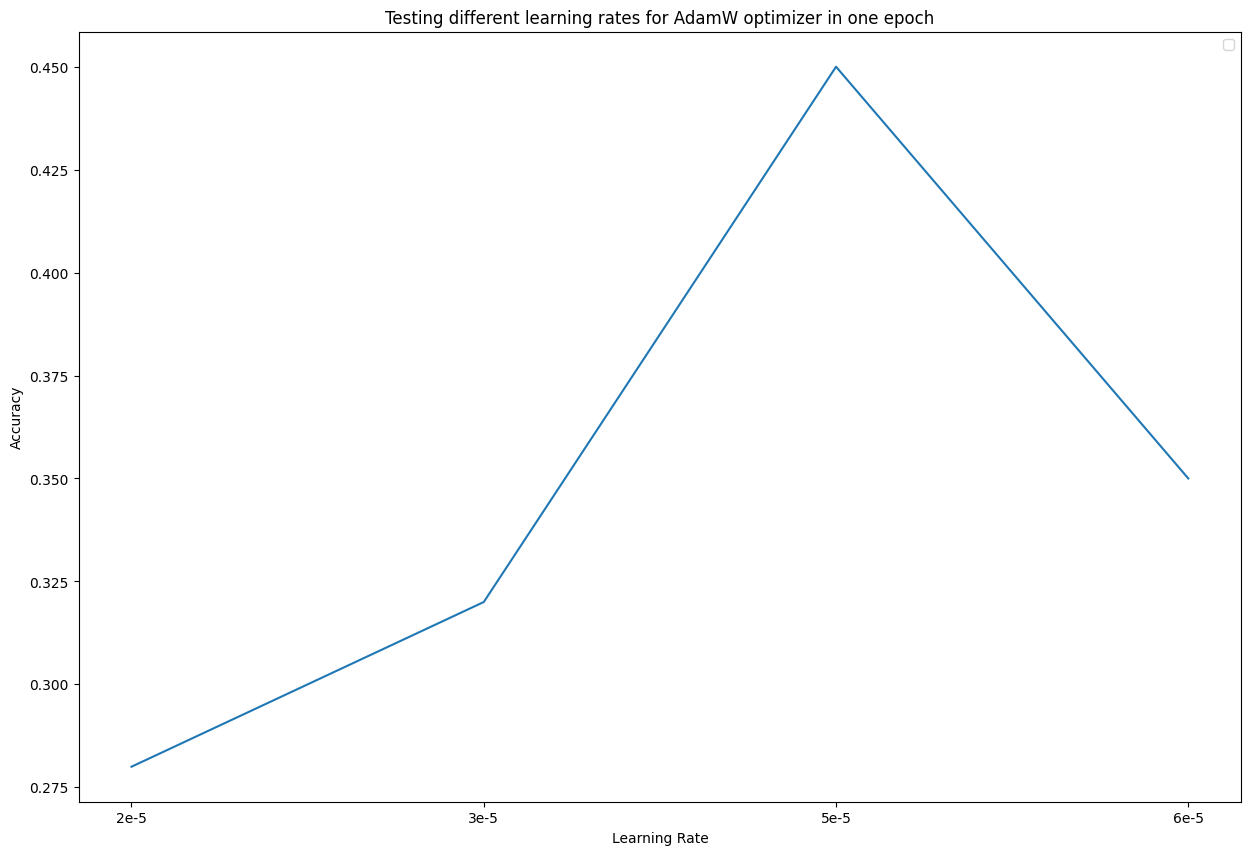

In [29]:
"""
Testing different learning rates for AdamW optimizer in one epoch
The following values of learning rates were tested on this code
Recommanded learning rate for BERT between 2e-5 and 5e-5
"""
learning_rate = ['2e-5','3e-5','5e-5','6e-5']
accuracy = [0.28,0.32,0.45,0.35]
plt.figure(figsize=(15,10))
plt.title('Testing different learning rates for AdamW optimizer in one epoch')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.legend()
plt.plot(learning_rate,accuracy)

In [30]:
#creating an AdamW optimizer
optimizer = AdamW(model.parameters(),
                  lr=5e-5,
                  eps=1e-8)
#recommanded epsilon : 1e-8

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [31]:
#Defining the number of epochs
epochs = 10

In [32]:
#creating a scheduler to update the learning rate while training
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0.1,
                                            num_training_steps=len(dataloader_train)*epochs)

In [33]:
import numpy as np

In [34]:
from sklearn.metrics import f1_score

In [35]:
#Defining the global accuracy function
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [36]:
#Defining the accuracy per class function
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_rep.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
    return preds_flat, labels_flat

In [37]:
#Defining the device on which we're going to run the code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [38]:
#Defining the evaluation function to get predictions and true types
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [39]:
#Training

import random
seed_value = 17
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)
f1_score_history = []
f1_score_train_history = []
train_loss_history = []
train_test_history = []

for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_test)
    tr_loss, predictions_train, true_vals_train = evaluate(dataloader_train)
    val_f1 = f1_score_func(predictions, true_vals)
    tr_f1 = f1_score_func(predictions_train, true_vals_train)
    f1_score_history.append(val_f1)
    f1_score_train_history.append(tr_f1)
    tqdm.write(f'Test loss: {val_loss}')
    train_test_history.append(val_loss)
    tqdm.write(f'F1 Score test (Weighted): {val_f1}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/231 [00:00<?, ?it/s]


Epoch 1
Training loss: 2.1438728519332355
Test loss: 1.873069440446249
F1 Score test (Weighted): 0.37509845404075054


Epoch 2:   0%|          | 0/231 [00:00<?, ?it/s]


Epoch 2
Training loss: 1.7425469201364558
Test loss: 1.7182044226948807
F1 Score test (Weighted): 0.4554593938891599


Epoch 3:   0%|          | 0/231 [00:00<?, ?it/s]


Epoch 3
Training loss: 1.4182321258953638
Test loss: 1.6817967484637004
F1 Score test (Weighted): 0.4939853140252855


Epoch 4:   0%|          | 0/231 [00:00<?, ?it/s]


Epoch 4
Training loss: 1.0540640075485428
Test loss: 1.7677718720785
F1 Score test (Weighted): 0.4810891933171652


Epoch 5:   0%|          | 0/231 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.7150654656030399
Test loss: 1.916646957397461
F1 Score test (Weighted): 0.4726588995763328


Epoch 6:   0%|          | 0/231 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.4741390294262341
Test loss: 2.0988738071627733
F1 Score test (Weighted): 0.4786300047475508


Epoch 7:   0%|          | 0/231 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.30898321639278753
Test loss: 2.3372559314820824
F1 Score test (Weighted): 0.47417702676506607


Epoch 8:   0%|          | 0/231 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.20581030740817904
Test loss: 2.3792368813258844
F1 Score test (Weighted): 0.4788472330153552


Epoch 9:   0%|          | 0/231 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.13742706985152386
Test loss: 2.527413644441744
F1 Score test (Weighted): 0.48294113463916943


Epoch 10:   0%|          | 0/231 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.10008871211021235
Test loss: 2.5557949397622086
F1 Score test (Weighted): 0.48226384772050007


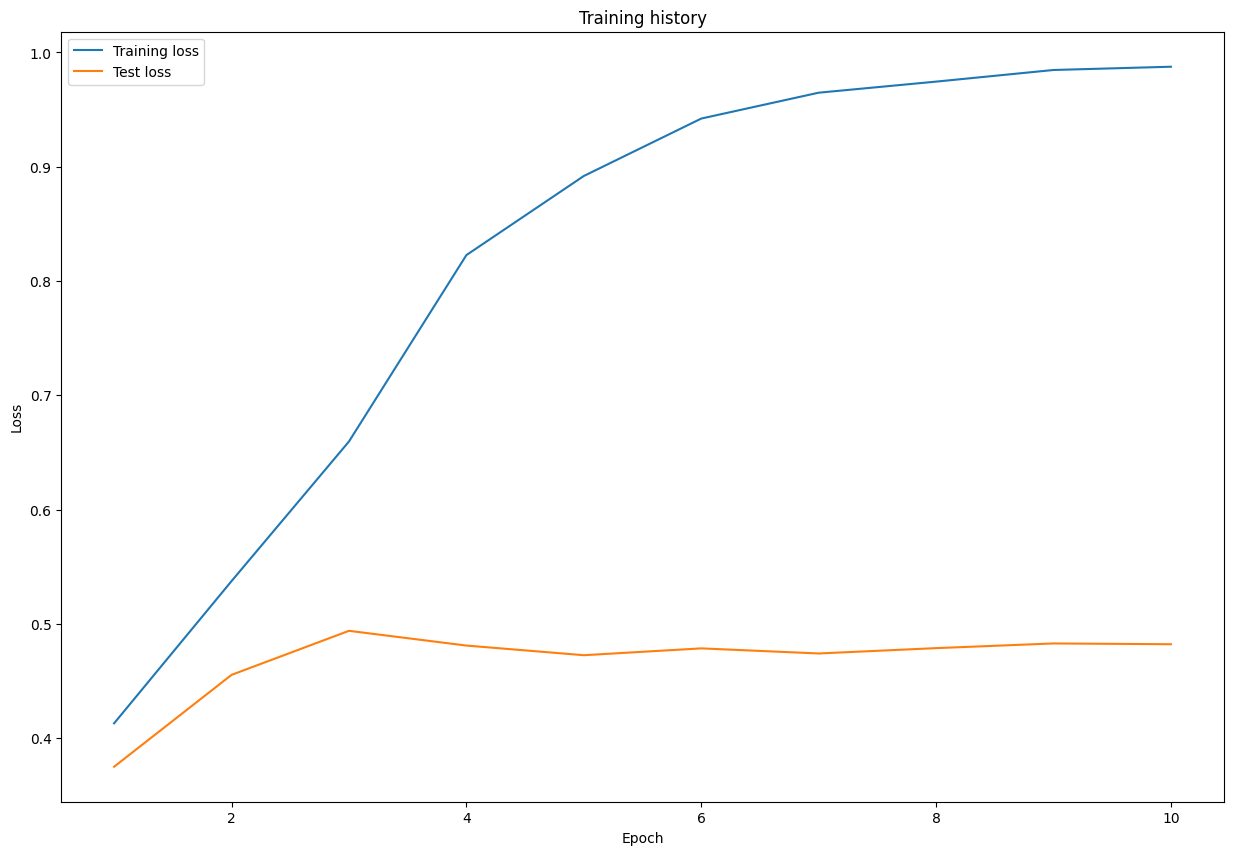

In [40]:
#Plotting the training and test accuracy per epoch

plt.figure(figsize=(15,10))
plt.plot(range(1,epochs+1),f1_score_train_history,label='Training loss')
plt.plot(range(1,epochs+1),f1_score_history,label='Test loss')
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()


In [41]:
#creating a BertForSequenceClassification model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_rep),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [42]:
#Loading the model we saved in a file
model.load_state_dict(torch.load('finetuned_BERT_epoch_4.model', map_location=torch.device('cuda')))

<ipython-input-42-9fa6d1341edf>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('finetuned_BERT_epoch_4.model', map_location=torch.device('

<All keys matched successfully>

In [43]:
#Getting the predictions and the types of the users in the test set
_, predictions, true_vals = evaluate(dataloader_test)

In [44]:
#Getting the accuracy per class of each personality type
y_preds, y_true = accuracy_per_class(predictions, true_vals)

Class: INFJ
Accuracy: 139/221

Class: ENTP
Accuracy: 42/103

Class: INTP
Accuracy: 93/196

Class: INTJ
Accuracy: 94/164

Class: ENTJ
Accuracy: 13/35

Class: ENFJ
Accuracy: 12/28

Class: INFP
Accuracy: 138/275

Class: ENFP
Accuracy: 49/101

Class: ISFP
Accuracy: 9/41

Class: ISTP
Accuracy: 17/50

Class: ISFJ
Accuracy: 10/25

Class: ISTJ
Accuracy: 9/31

Class: ESTP
Accuracy: 4/13

Class: ESFP
Accuracy: 0/7

Class: ESTJ
Accuracy: 0/6

Class: ESFJ
Accuracy: 2/6



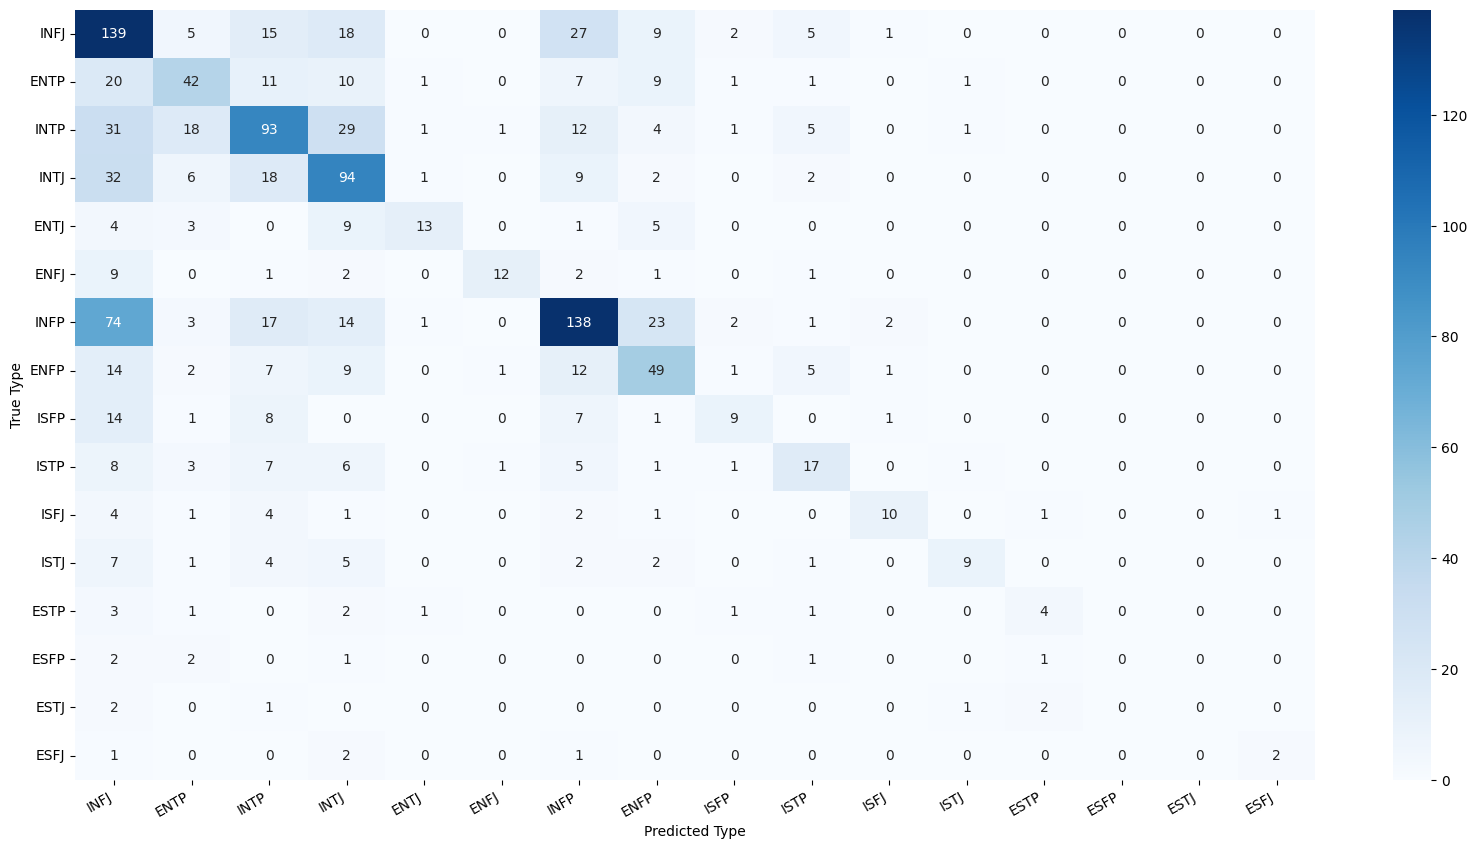

In [45]:
#Plotting the confusion matrix in order to identifiy the misclassified types
from sklearn import metrics
def show_confusion_matrix(confusion_matrix):
  plt.figure(figsize=(20,10))
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True Type')
  plt.xlabel('Predicted Type');

cm = metrics.confusion_matrix(y_true, y_preds)
df_cm = pd.DataFrame(cm, index=labels2, columns=labels2)
show_confusion_matrix(df_cm)

In [46]:
"""
In the next step, we're going to try to understand the reason why certain personality types are being misclassified.
We're gonna use INFP and INFJ personality types as an example.
We're going to identify the vocabulary used in commun between these two types and calculate its percentage
"""
infj = df[df.type=='INFJ'].posts.values

In [47]:
infp = df[df.type=='INFP'].posts.values

In [48]:
infj_tokens = []
for post in infj:
  tokens = tokenizer.tokenize(post)
  infj_tokens = infj_tokens + tokens
infj_tokens = list(set(infj_tokens))
len(infj_tokens)

20629

In [49]:
infp_tokens = []
for post in infp:
  tokens = tokenizer.tokenize(post)
  infp_tokens = infp_tokens + tokens
infp_tokens = list(set(infp_tokens))
len(infp_tokens)

21417

In [50]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [51]:
inter = intersection(infj_tokens,infp_tokens)

In [52]:
len(inter)/len(infp_tokens)*100

88.691226595695

In [53]:
len(inter)/len(infj_tokens)*100

92.07911192980755

The results obtained are realistic, since INFPs and INFJs share many personality traits according to psychologists.

In [54]:
#Identifying the missclassifications in each personaity trait
def translate(list1 , list2):
  lst=[]
  for x in list1:
    if x in list2:
      lst.append(0)
    else:
      lst.append(1)
  return(lst)
y_true_ie=translate(y_true,[0,6,3,2,10,8,11,9])
y_preds_ie=translate(y_preds,[0,6,3,2,10,8,11,9])

y_true_sn=translate(y_true,[15,13,14,12,10,8,11,9])
y_preds_sn=translate(y_preds,[15,13,14,12,10,8,11,9])

y_true_tf=translate(y_true,[4,1,14,12,3,2,11,9])
y_preds_tf=translate(y_preds,[4,1,14,12,3,2,11,9])

y_true_jp=translate(y_true,[5,4,15,14,0,3,10,11])
y_preds_jp=translate(y_preds,[5,4,15,14,0,3,10,11])

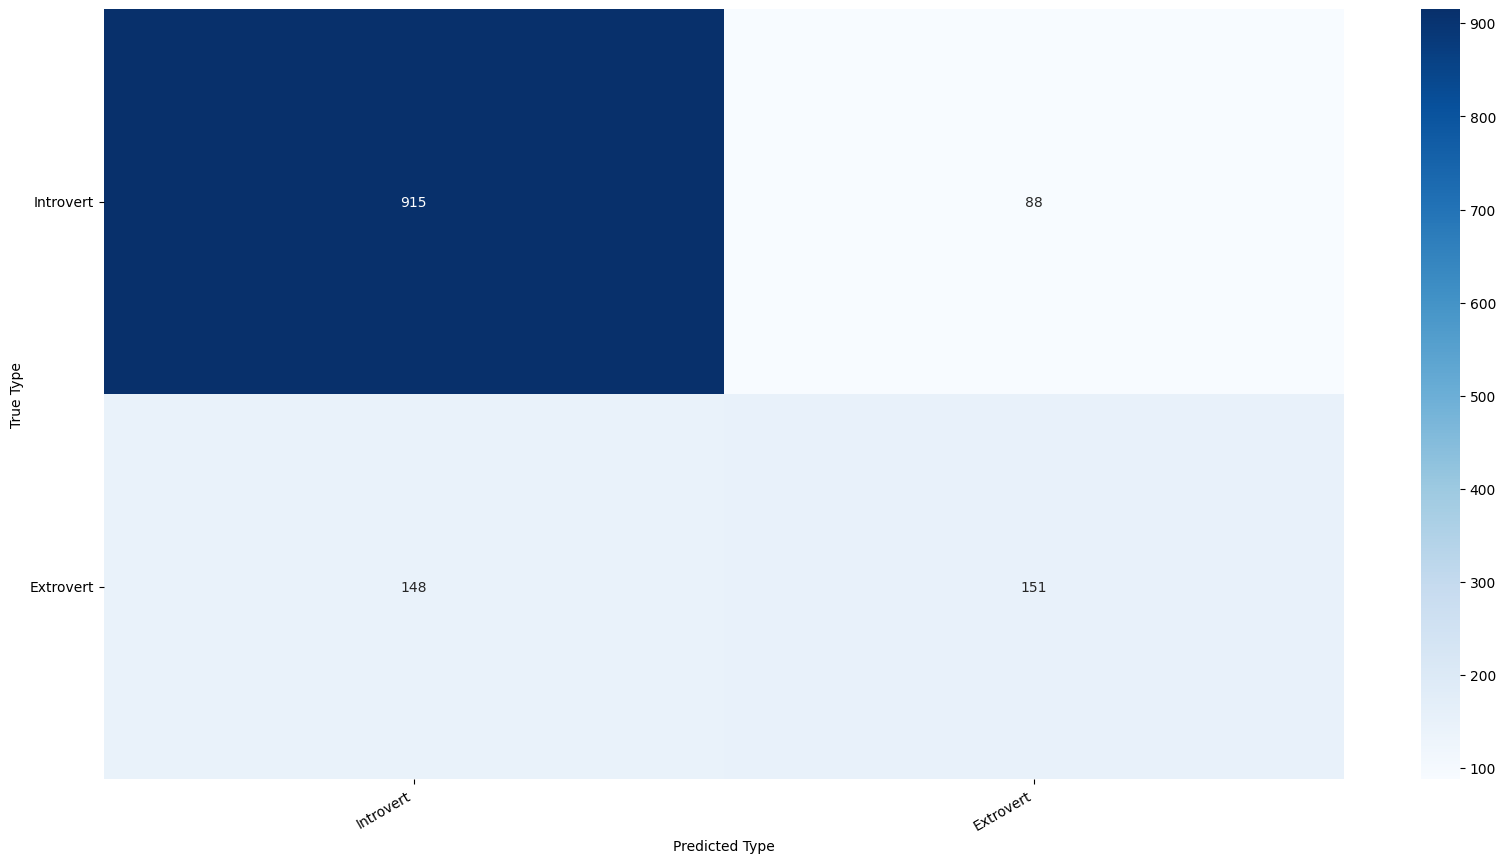

In [55]:
#Plotting the confusion matrix for Introverts vs Extroverts
cm = metrics.confusion_matrix(y_true_ie, y_preds_ie)
df_cm = pd.DataFrame(cm, index=['Introvert','Extrovert'], columns=['Introvert','Extrovert'])
show_confusion_matrix(df_cm)

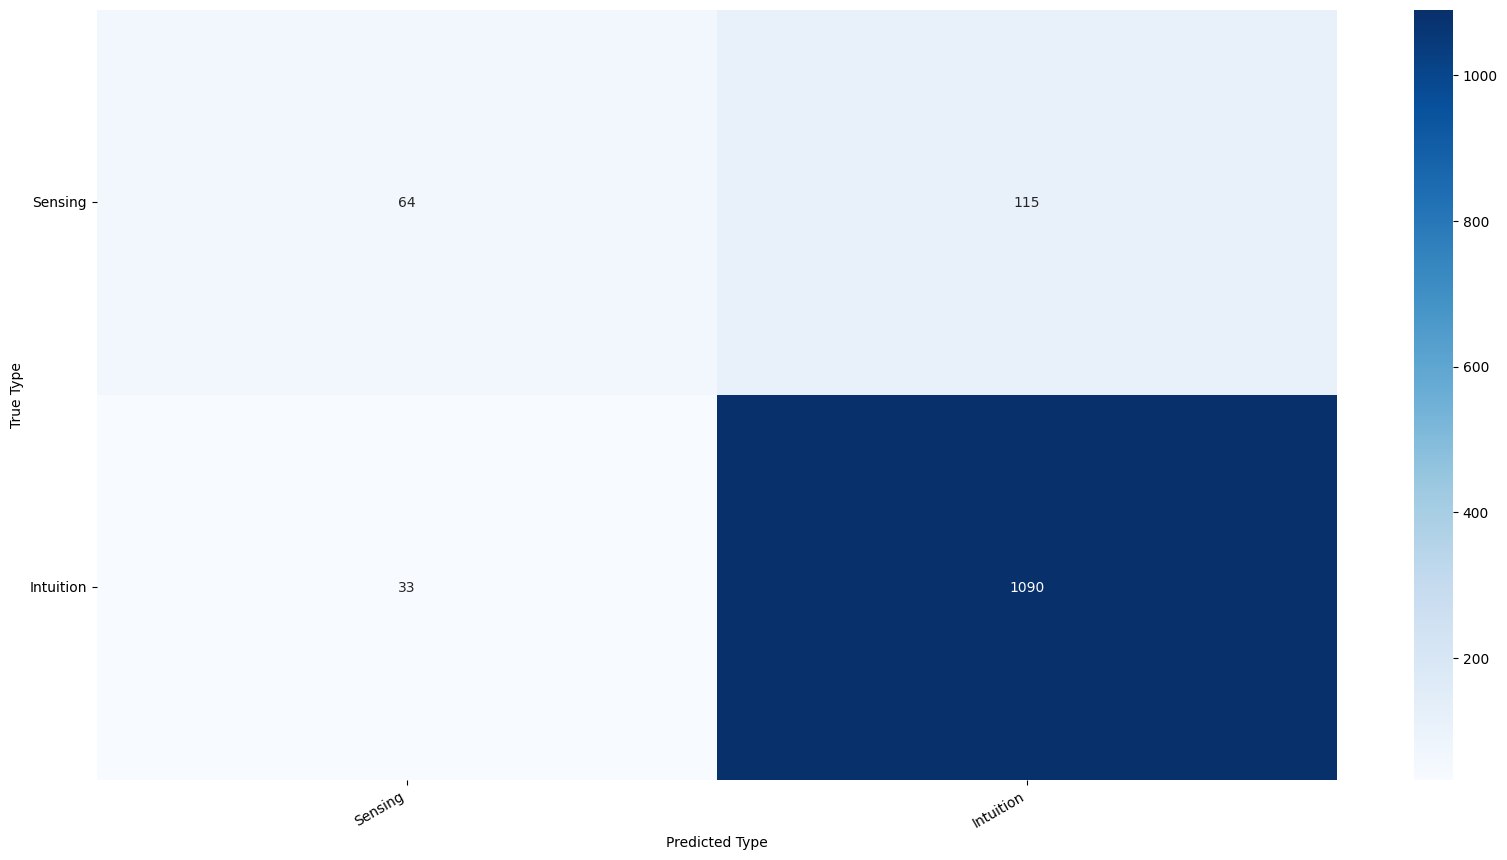

In [56]:
#Plotting the confusion matrix for Sensing vs Intuitive
cm = metrics.confusion_matrix(y_true_sn, y_preds_sn)
df_cm = pd.DataFrame(cm, index=['Sensing','Intuition'], columns=['Sensing','Intuition'])
show_confusion_matrix(df_cm)

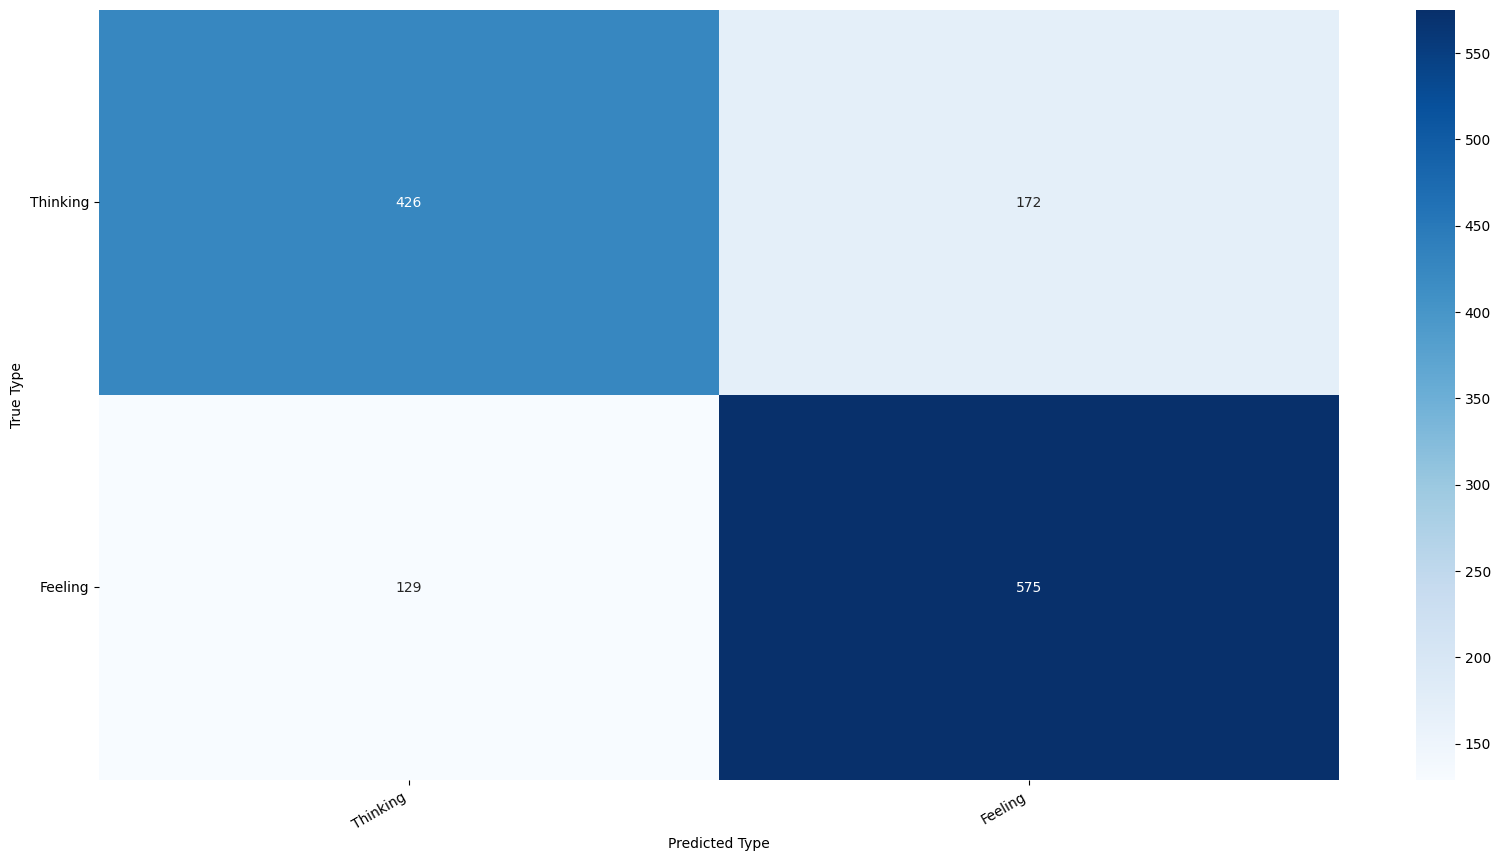

In [57]:
#Plotting the confusion matrix for Thinking vs Feeling
cm = metrics.confusion_matrix(y_true_tf, y_preds_tf)
df_cm = pd.DataFrame(cm, index=['Thinking','Feeling'], columns=['Thinking','Feeling'])
show_confusion_matrix(df_cm)

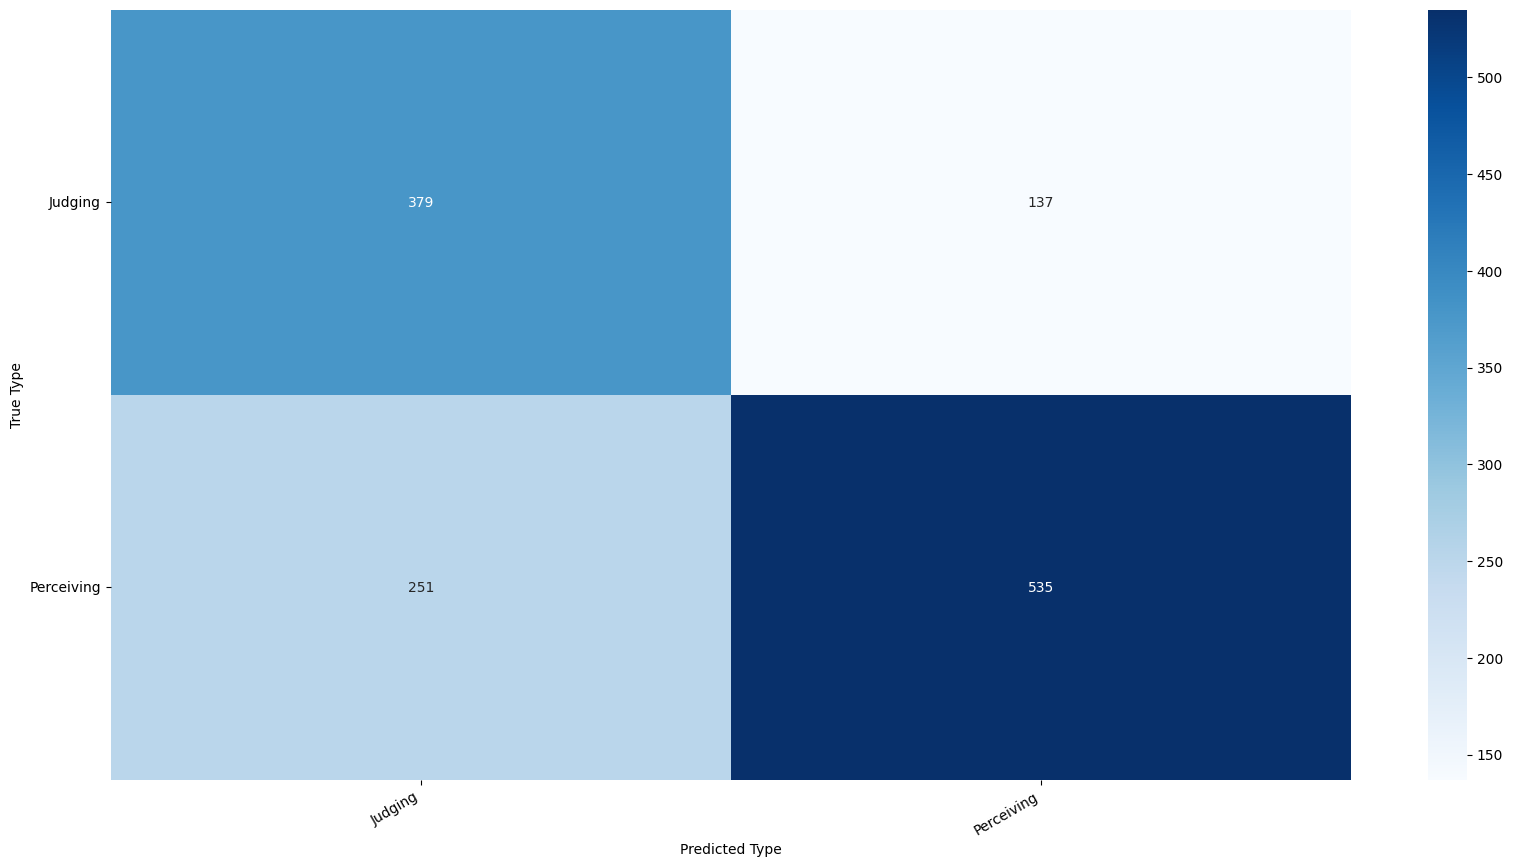

In [58]:
#Plotting the confusion matrix for Judging vs Perceiving
cm = metrics.confusion_matrix(y_true_jp, y_preds_jp)
df_cm = pd.DataFrame(cm, index=['Judging','Perceiving'], columns=['Judging','Perceiving'])
show_confusion_matrix(df_cm)
